In [126]:
import pandas as pd

# To load CSV into Dataframe (df)
file_path = r'D:\data-set_601\Motor_Vehicle_Collisions_-_Crashes.csv'
df = pd.read_csv(file_path)

In [101]:
# Metadata
head = df.head(2)
print("Head:", head)



Head:   CRASH DATE CRASH TIME   BOROUGH  ZIP CODE  NUMBER OF PERSONS INJURED  \
0  7/27/2012      20:53  BROOKLYN   11233.0                          0   
1   8/1/2012      10:22  BROOKLYN   11208.0                          1   

   NUMBER OF PERSONS KILLED  NUMBER OF PEDESTRIANS INJURED  \
0                       0.0                              0   
1                       0.0                              0   

   NUMBER OF PEDESTRIANS KILLED  NUMBER OF CYCLIST INJURED  \
0                             0                          0   
1                             0                          1   

   NUMBER OF CYCLIST KILLED  ...  CONTRIBUTING FACTOR VEHICLE 2  \
0                         0  ...                    Unspecified   
1                         0  ...                    Unspecified   

   CONTRIBUTING FACTOR VEHICLE 3 CONTRIBUTING FACTOR VEHICLE 4  \
0                            NaN                           NaN   
1                            NaN                           NaN 

In [102]:
df['BOROUGH'].fillna('Unspecified', inplace=True)

# To add values in 'CONTRIBUTING FACTOR VEHICLE 1' column where its empty
df['CONTRIBUTING FACTOR VEHICLE 1'].fillna('Unspecified', inplace=True)


In [103]:
# Grouping data by borough and counting the occurrences of contributing factors
grouped_factors = df.groupby('BOROUGH')['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

# Getting the top 3 reasons for crashes by borough
top_reasons_by_borough = grouped_factors.groupby(level=0).nlargest(3)

print(top_reasons_by_borough)

BOROUGH        BOROUGH        CONTRIBUTING FACTOR VEHICLE 1 
BRONX          BRONX          Unspecified                       35826
                              Driver Inattention/Distraction    19916
                              Failure to Yield Right-of-Way      6022
BROOKLYN       BROOKLYN       Unspecified                       67886
                              Driver Inattention/Distraction    48896
                              Failure to Yield Right-of-Way     16175
MANHATTAN      MANHATTAN      Driver Inattention/Distraction    37160
                              Unspecified                       27210
                              Following Too Closely              8480
QUEENS         QUEENS         Driver Inattention/Distraction    50033
                              Unspecified                       42195
                              Failure to Yield Right-of-Way     18984
STATEN ISLAND  STATEN ISLAND  Driver Inattention/Distraction     6752
                             

In [127]:
# Handling missing values in 'VEHICLE TYPE CODE 1 and 2' by replacing with 'Unspecified'
df['VEHICLE TYPE CODE 1'].fillna('Unspecified', inplace=True)
df['VEHICLE TYPE CODE 2'].fillna('Unspecified', inplace=True)

In [128]:
# Concatenating 'VEHICLE TYPE CODE 1' and 'VEHICLE TYPE CODE 2' into a single column
vehicles_combined = pd.concat([df['VEHICLE TYPE CODE 1'], df['VEHICLE TYPE CODE 2']])

# Grouping data by borough and counting the occurrences of vehicle types
grouped_vehicles = vehicles_combined.groupby(df['BOROUGH']).value_counts()

# Getting the top 3 vehicles in crashes by borough
top_vehicles_by_borough = grouped_vehicles.groupby(level=0).nlargest(3)

print(top_vehicles_by_borough)

BOROUGH        BOROUGH                                           
BRONX          BRONX          Sedan                                   89224
                              Station Wagon/Sport Utility Vehicle     62731
                              Unspecified                             34510
BROOKLYN       BROOKLYN       Sedan                                  178684
                              Station Wagon/Sport Utility Vehicle    131690
                              Unspecified                             61599
MANHATTAN      MANHATTAN      Sedan                                   88483
                              Station Wagon/Sport Utility Vehicle     63287
                              Taxi                                    31302
QUEENS         QUEENS         Sedan                                  152310
                              Station Wagon/Sport Utility Vehicle    127325
                              Unspecified                             49435
STATEN ISLAND  STATEN 

In [129]:
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,7/27/2012,20:53,BROOKLYN,11233.0,0,0.0,0,0,0,0,...,Unspecified,NaN,NaN,NaN,4441145,Station Wagon/Sport Utility Vehicle,E-Scooter,NaN,NaN,NaN
1,8/1/2012,10:22,BROOKLYN,11208.0,1,0.0,0,0,1,0,...,Unspecified,NaN,NaN,NaN,4443197,Station Wagon/Sport Utility Vehicle,Bike,NaN,NaN,NaN
2,9/25/2012,12:36,QUEENS,11385.0,0,0.0,0,0,0,0,...,Unspecified,NaN,NaN,NaN,4461135,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
3,10/22/2012,17:18,NaN,NaN,0,0.0,0,0,0,0,...,Other Vehicular,Other Vehicular,NaN,NaN,4470433,Sedan,Sedan,Sedan,NaN,NaN
4,3/16/2016,12:30,NaN,NaN,0,0.0,0,0,0,0,...,Unspecified,NaN,NaN,NaN,3429919,4 dr sedan,4 dr sedan,NaN,NaN,NaN


In [109]:
df['CRASH TIME'] = pd.to_datetime(df['CRASH TIME'], format='%I:%M:%S %p')


# Function to categorize time into slots
def get_time_slot(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

# Extract hour from 'CRASH TIME' column and create 'TIME SLOT' column
df['TIME SLOT'] = df['CRASH TIME'].dt.hour.apply(get_time_slot)

# Group by time slot and calculate the sum of injuries and deaths
injuries_deaths_by_time = df.groupby('TIME SLOT')[['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']].sum()

print(injuries_deaths_by_time)

           NUMBER OF PERSONS INJURED  NUMBER OF PERSONS KILLED
TIME SLOT                                                     
Afternoon                     120063                     365.0
Evening                       100322                     475.0
Morning                        73489                     301.0
Night                          42633                     410.0


### Most Injury happens in Afternoon and the most death happens in Evening and followed up by Night timing.

In [110]:
import holidays

# Convert 'CRASH DATE' to datetime format
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])

# Create a holiday object for US holidays
us_holidays = holidays.US() 

# Function to check if the date is a holiday
def is_us_holiday(date):
    return date in us_holidays

# Create a new column 'IsHoliday' indicating if it's a US holiday
df['IsHoliday'] = df['CRASH DATE'].apply(is_us_holiday)

In [111]:
injuries_on_holidays = df[(df['IsHoliday']) & (df['NUMBER OF PERSONS INJURED'] > 0)]

# Count the number of injuries that occurred on holidays
total_injuries_on_holidays = injuries_on_holidays['NUMBER OF PERSONS INJURED'].sum()

print(f"Total injuries on holidays: {total_injuries_on_holidays}")

Total injuries on holidays: 9707


In [112]:
from scipy import stats


injuries_on_holidays = df[df['IsHoliday']]['NUMBER OF PERSONS INJURED']
injuries_on_non_holidays = df[~df['IsHoliday']]['NUMBER OF PERSONS INJURED']

# Perform t-test
t_stat, p_value = stats.ttest_ind(injuries_on_holidays, injuries_on_non_holidays, equal_var=False)

# Check if the p-value is less than 0.05 (5% significance level)
if p_value < 0.05:
    print(f"The difference in injuries between holidays and non-holidays is statistically significant (p-value: {p_value})")
else:
    print(f"The difference in injuries between holidays and non-holidays is not statistically significant (p-value: {p_value})")


The difference in injuries between holidays and non-holidays is statistically significant (p-value: 2.4469268810215854e-20)


In [113]:
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])

# Create a column indicating weekday (0-4: Monday-Friday) and weekend (5-6: Saturday-Sunday)
df['DAY OF WEEK'] = df['CRASH DATE'].dt.dayofweek

# Define a function to categorize days as weekday or weekend
def categorize_day(day):
    if day < 5:
        return 'Weekday'
    else:
        return 'Weekend'

# Apply the function to create a new column 'WEEKDAY OR WEEKEND'
df['WEEKDAY OR WEEKEND'] = df['DAY OF WEEK'].apply(categorize_day)

# Group by the 'WEEKDAY OR WEEKEND' column and count the number of injuries
injuries_by_day = df['WEEKDAY OR WEEKEND'].value_counts()

print(injuries_by_day)

WEEKDAY OR WEEKEND
Weekday    781060
Weekend    267515
Name: count, dtype: int64


In [115]:
# Separate injuries on weekdays and weekends
injuries_weekday = df[df['WEEKDAY OR WEEKEND'] == 'Weekday']['NUMBER OF PERSONS INJURED']
injuries_weekend = df[df['WEEKDAY OR WEEKEND'] == 'Weekend']['NUMBER OF PERSONS INJURED']


# Perform t-test
t_stat, p_value = stats.ttest_ind(injuries_weekday, injuries_weekend, equal_var=False)

# Check if the p-value is less than 0.05 (5% significance level)
if p_value < 0.05:
    print(f"The difference in injuries between weekdays and weekends is statistically significant (p-value: {p_value})")
else:
    print(f"The difference in injuries between weekdays and weekends is not statistically significant (p-value: {p_value})")

The difference in injuries between weekdays and weekends is statistically significant (p-value: 1.4545149006064468e-143)


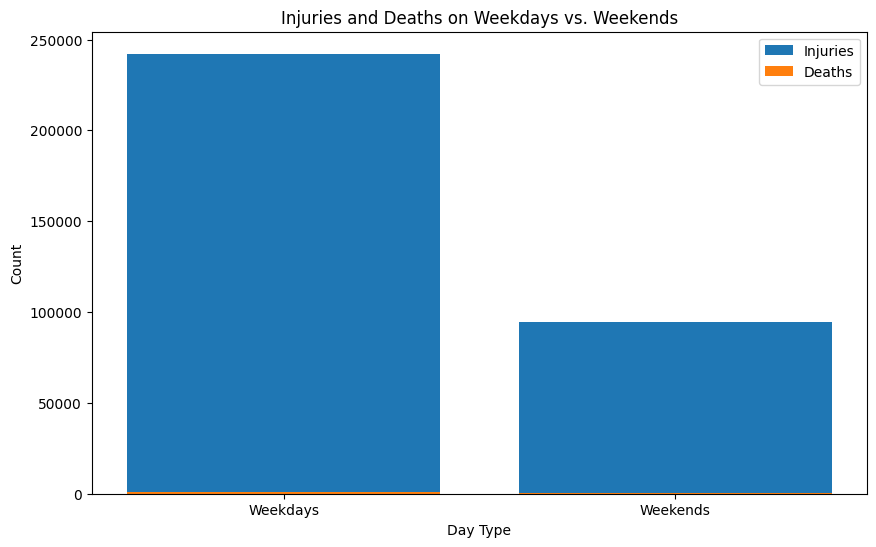

In [120]:
import matplotlib.pyplot as plt


weekday_data = df[df['CRASH DATE'].dt.dayofweek < 5]  # Weekdays (Monday=0, Sunday=6)
weekend_data = df[df['CRASH DATE'].dt.dayofweek >= 5]  # Weekends

deaths_weekday = weekday_data['NUMBER OF PERSONS KILLED'].sum()
deaths_weekend = weekend_data['NUMBER OF PERSONS KILLED'].sum()

# Create bar plot for injuries and deaths on weekdays vs. weekends
plt.figure(figsize=(10, 6))

plt.bar(['Weekdays', 'Weekends'], [injuries_weekday.sum(), injuries_weekend.sum()], label='Injuries')
plt.bar(['Weekdays', 'Weekends'], [deaths_weekday.sum(), deaths_weekend.sum()], label='Deaths')

plt.xlabel('Day Type')
plt.ylabel('Count')
plt.title('Injuries and Deaths on Weekdays vs. Weekends')
plt.legend()
plt.show()


<Figure size 1200x800 with 0 Axes>

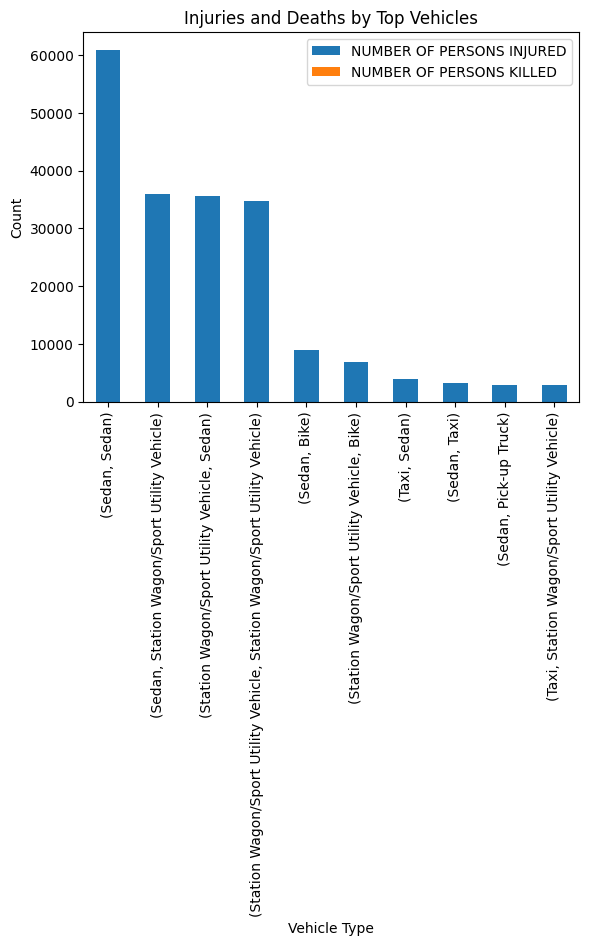

In [125]:

vehicle_accidents = df[['VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']]

# Dropping rows with missing values in 'VEHICLE TYPE CODE 1' or 'VEHICLE TYPE CODE 2'
vehicle_accidents = vehicle_accidents.dropna(subset=['VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2'])

# Group by vehicle type and calculate sum of injuries and deaths
vehicle_injuries_deaths = vehicle_accidents.groupby(['VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2'])[['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']].sum()

# Sort by total injuries + deaths and get the top vehicles
top_vehicles = vehicle_injuries_deaths.assign(Total=vehicle_injuries_deaths.sum(axis=1)).sort_values(by='Total', ascending=False).head(10)

plt.figure(figsize=(12, 8))

# Create bar plot for top vehicles and their injuries + deaths
top_vehicles[['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']].plot(kind='bar', stacked=True)

plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.title('Injuries and Deaths by Top Vehicles')
plt.legend()
plt.show()

<Figure size 1000x600 with 0 Axes>

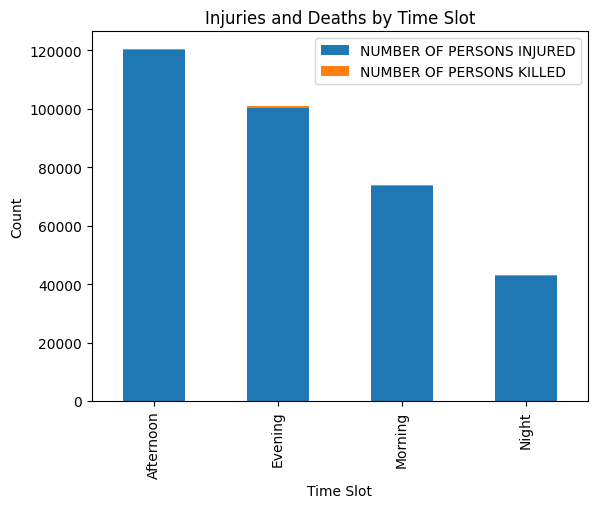

In [119]:
import matplotlib.pyplot as plt

# Assuming you have the 'injuries_deaths_by_time' DataFrame with injury and death counts based on time slots

# Create a bar plot for injuries and deaths by time slot
plt.figure(figsize=(10, 6))

injuries_deaths_by_time.plot(kind='bar', stacked=True)

plt.xlabel('Time Slot')
plt.ylabel('Count')
plt.title('Injuries and Deaths by Time Slot')
plt.legend()
plt.show()
